In [1]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
import pandas as pd
import numpy as np
import pickle

In [2]:
#reading the data from csv file
df=pd.read_csv("https://raw.githubusercontent.com/irshad256/ML-projects/main/used%20cars%20price%20prediction/data/train-data.csv",index_col=0)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
df.shape

(6019, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 658.3+ KB


In [5]:
#checking for null values
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [6]:
#dropping 'New_Price column since it has lot of null values
df.drop(['New_Price'],inplace=True,axis=1)

In [7]:
#dropping null values from dataframe
df=df.dropna()
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [8]:
#checking data types of columns
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [9]:
#Removing the units and changing data type of Mileage to float
df[['Mileage','mileage_unit']]=df.Mileage.str.split(expand=True)
df.drop(['mileage_unit'],axis=1,inplace=True)
df.Mileage=df.Mileage.astype(float)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,17.74


In [10]:
#Removing the units and changing data type of Engine to float
df[['Engine','unit']]=df.Engine.str.split(expand=True)
df.Engine=df.Engine.astype(float)
df.drop(['unit'],inplace=True,axis=1)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8 bhp,5.0,17.74


In [11]:
df[['Power','unit']]=df.Power.str.split(expand=True)

In [12]:
i=df[df.Power=='null'].index
df.drop(i,inplace=True)

In [13]:
#Changing data type of Power to float
df.Power=df.Power.astype(float)
df.drop(['unit'],inplace=True,axis=1)

In [14]:
#converting name to uppercase
df['Name']=df['Name'].str.upper()

In [15]:
df.Name.nunique()

1787

In [16]:
#label encoding categorical features
le=LabelEncoder()
df.Name=le.fit_transform(df.Name)
df.Location=le.fit_transform(df.Location)
df.Fuel_Type=le.fit_transform(df.Fuel_Type)
df.Transmission=le.fit_transform(df.Transmission)

In [17]:
df.Owner_Type.unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [18]:
df.Owner_Type=df.Owner_Type.map({'Fourth & Above' : 0, 'Third' : 1, 'Second' : 2, 'First' : 3})

In [19]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1127,9,2010,72000,0,1,3,26.60,998.0,58.16,5.0,1.75
1,489,10,2015,41000,1,1,3,19.67,1582.0,126.20,5.0,12.50
2,463,2,2011,46000,3,1,3,18.20,1199.0,88.70,5.0,4.50
3,1007,2,2012,87000,1,1,3,20.77,1248.0,88.76,7.0,6.00
4,22,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74


In [20]:
#splitting data into features and labels
X=df.drop(['Price'],axis=1)
Y=df.Price
X.shape,Y.shape

((5872, 11), (5872,))

In [21]:
#finding correlation of features with label
X.corrwith(Y)

Name                -0.098909
Location            -0.118238
Year                 0.299475
Kilometers_Driven   -0.008249
Fuel_Type           -0.301626
Transmission        -0.585623
Owner_Type           0.091098
Mileage             -0.341652
Engine               0.658047
Power                0.772843
Seats                0.055547
dtype: float64

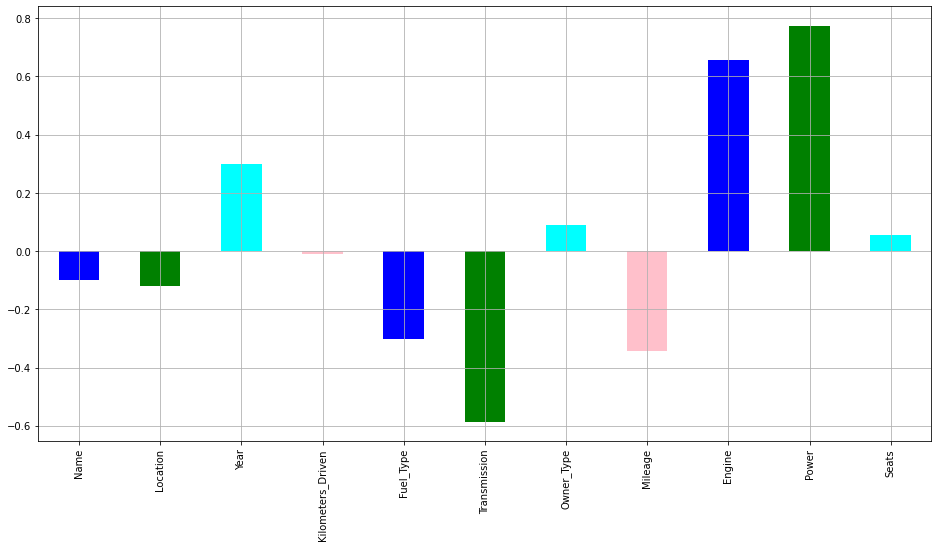

In [22]:
X.corrwith(Y).plot.bar(grid=True,figsize=(16,8),color=['blue','green','cyan','pink'])

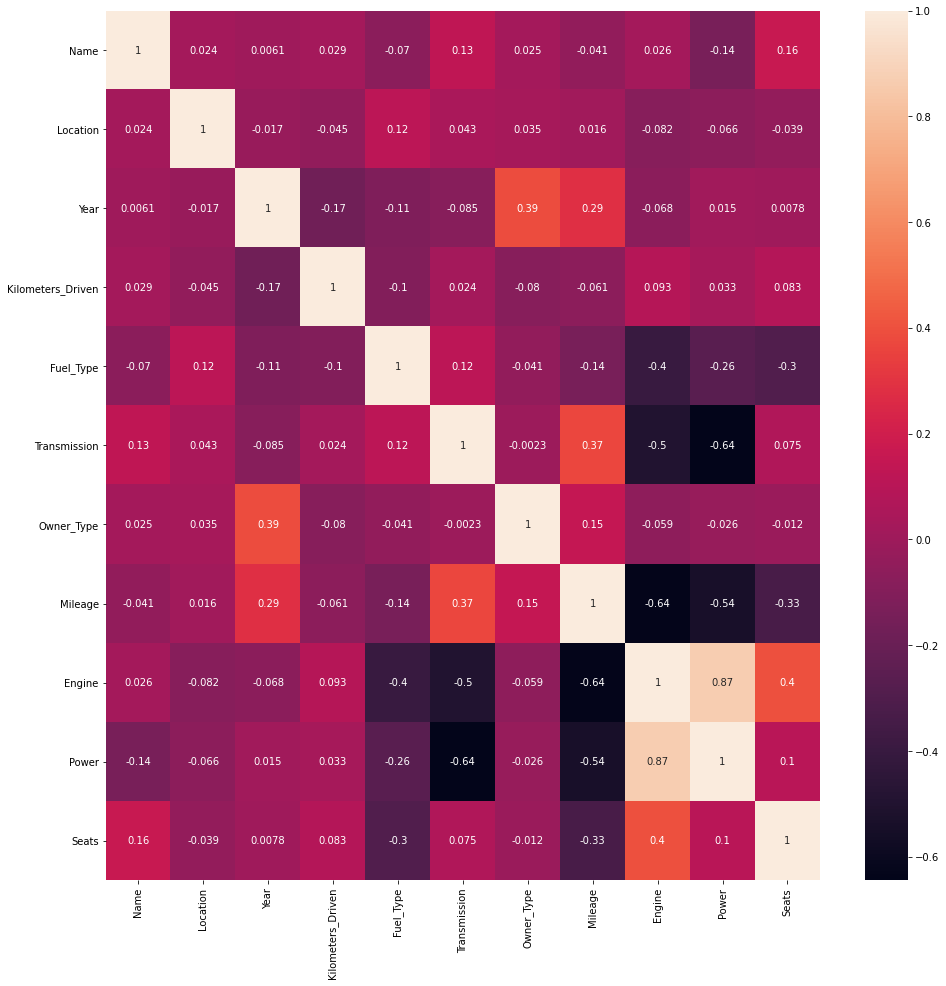

In [23]:
#checking correlation between features
corelation = X.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corelation,annot=True)

In [24]:
#splitting data into train, test and crossvalidation
X1,x_test,Y1,y_test=train_test_split(X,Y,random_state=10,test_size=.15)
x_train,x_cv,y_train,y_cv=train_test_split(X1,Y1,random_state=10,test_size=.15)
x_train.shape,y_train.shape,x_cv.shape,y_cv.shape,x_test.shape,y_test.shape

((4242, 11), (4242,), (749, 11), (749,), (881, 11), (881,))

##**Random Forest**

In [25]:
nestimators=[3,5,7,9,11,13,17,21,25,29,33,37,41,45,50,55,65,70,75,80,90,100]
score=[]
for n in nestimators:
  rf_model=RandomForestRegressor(n_estimators=n,random_state=15)
  rf_model.fit(x_train,y_train)
  score.append(rf_model.score(x_cv,y_cv))
  print(f"score = {rf_model.score(x_cv,y_cv)} , n_estimators = {n}")

score = 0.8229523130669318 , n_estimators = 3
score = 0.8560700219783234 , n_estimators = 5
score = 0.8843255826980458 , n_estimators = 7
score = 0.896565608145992 , n_estimators = 9
score = 0.8990434358908236 , n_estimators = 11
score = 0.8993738967710523 , n_estimators = 13
score = 0.8989817722740189 , n_estimators = 17
score = 0.9051846261158639 , n_estimators = 21
score = 0.9022380935815976 , n_estimators = 25
score = 0.9012350765712207 , n_estimators = 29
score = 0.8981712152501543 , n_estimators = 33
score = 0.8970868026733114 , n_estimators = 37
score = 0.8988235158796739 , n_estimators = 41
score = 0.8981277666738385 , n_estimators = 45
score = 0.8978938426424776 , n_estimators = 50
score = 0.8987668948054957 , n_estimators = 55
score = 0.8971393800813968 , n_estimators = 65
score = 0.8984749392769709 , n_estimators = 70
score = 0.8990555131682254 , n_estimators = 75
score = 0.8969882353786474 , n_estimators = 80
score = 0.8946610572526973 , n_estimators = 90
score = 0.89367316

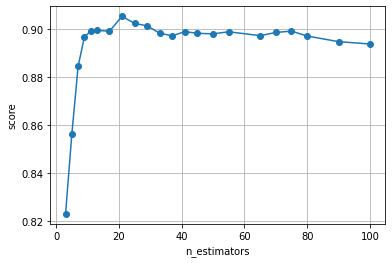

In [26]:
plt.plot(nestimators,score,marker='o')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.grid()

In [27]:
best_model=RandomForestRegressor(n_estimators=21)
best_model.fit(X1,Y1)
best_model.score(x_test,y_test)

0.9313198074808418

##Saving Model

In [ ]:
pickle.dump(best_model,open('model.sav','wb'))
files.download('model.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>